### Desafío 2: Predicción de Series Temporales

Descripción del problema:

Tienes un conjunto de datos que contiene información sobre las ventas diarias de un producto durante un período de tiempo. Tu objetivo es construir un modelo de predicción de series temporales para predecir las ventas futuras de este producto.

Fecha       Ventas
2023-01-01  50
2023-01-02  55
2023-01-03  60
2023-01-04  52
...
Tareas:

- Carga y procesa los datos que sean adecuados para su uso en un modelo de serie temporal.

- Divide los datos en conjuntos de entrenamiento y prueba.

- Construya un modelo de predicción de series temporales utilizando una técnica como ARIMA o SARIMA.

- Ajusta el modelo a los datos de entrenamiento.

- Realice predicciones para un período futuro y evalúe el rendimiento del modelo utilizando métricas adecuadas, como el error cuadrático medio (MSE) o el error absoluto medio (MAE).

- Presenta tus resultados visualmente, mostrando las predicciones junto con los datos de prueba reales.

Asegúrate de documentar tu proceso y explicar tus decisiones a lo largo del camino. También, si es posible, puedes utilizar bibliotecas de Python como pandas, numpy, statsmodelsy matplotlibpara realizar este desafío.

In [2]:

#carga y/o creacion de datos
import numpy as np
import pandas as pd

num_filas=100
fechas=pd.date_range(start='2023-01-01', periods=num_filas, freq='D')
ventas= np.random.randint(0,80, num_filas)

data ={
    'Fecha': fechas,
    'Ventas': ventas
}

df= pd.DataFrame(data)

df.head()

,Fecha,Ventas
0,2023-01-01,77
1,2023-01-02,48
2,2023-01-03,41
3,2023-01-04,58
4,2023-01-05,62


In [3]:
#Analisis exploratorio
df.describe()

,Ventas
count,100.000000
mean,41.680000
std,23.938423
min,0.000000
25%,17.000000
50%,43.000000
75%,62.750000
max,78.000000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   Fecha   100 non-null    datetime64[ns]
 1   Ventas  100 non-null    int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.7 KB


In [ ]:
df['Ventas'].max()

77

In [ ]:
promedio= df['Ventas'].mean()
moda= df['Ventas'].mode()
mediana=df['Ventas'].median()

print('El promedio de ventas es:',promedio)
print('La moda es:', moda)
print('La mediana es:', mediana)

El promedio de ventas es: 41.77
La moda es: 0    16
Name: Ventas, dtype: int64
La mediana es: 41.0


In [ ]:
#RIC Rango Intercuartil, para sacar información sobre la dispersión en el rango intermedio de tus datos de ventas.
# VARIABILIDAD DE LAS VENTAS

# Calculo Q1 y Q3
q1 = df['Ventas'].quantile(0.25)
q3 = df['Ventas'].quantile(0.75)

print("Primer Cuartil (Q1):", q1)
print("Tercer Cuartil (Q3):", q3)

ric = q3 - q1
print("Rango Intercuartil (RIC):", ric)


Primer Cuartil (Q1): 22.75
Tercer Cuartil (Q3): 62.5
Rango Intercuartil (RIC): 39.75


Primer Cuartil (Q1): 22,75

El 25% de las ventas tienen un valor igual o inferior a 22,75. En otras palabras, aproximadamente el primer cuarto de las ventas son relativamente bajas en comparación con el resto de los datos.

Tercer Cuartil (Q3): 62,5

Esto significa que el 75% de las ventas tienen un valor igual o inferior a 62,5. En este caso, el tercer cuarto de las ventas son relativamente más altos en comparación con el primer cuarto.

Rango Intercuartil (RIC): 39,75

El RIC es la diferencia entre Q3 y Q1.

 Esto representa la dispersión intercuartil, es decir, la variabilidad en las ventas dentro del rango intermedio de los datos. Un RIC más amplio indica una mayor dispersión en el rango intermedio.

En resumen, se puede concluir que la mayoría de las ventas (el 50% central) se encuentra en un rango de aproximadamente 22.75 a 62.5. Esto nos da una idea de la variabilidad en las ventas en ese rango específico. Cualquier venta por encima de 62.5 o por debajo de 22.75 podría considerarse atípica y merecería una mayor atención para comprender por qué se desvía significativamente de la tendencia general.

In [4]:
# Establecer la fecha como indice
df.set_index('Fecha', inplace=True)

In [5]:
df

,Ventas
Fecha,
2023-01-01,77
2023-01-02,48
2023-01-03,41
2023-01-04,58
2023-01-05,62
...,...
2023-04-06,19
2023-04-07,6
2023-04-08,7


## 2. División en conjuntos
Para entrenar el modelo y evaluar su rendimiento, se divide el conjunto

In [6]:
# Divido los datos en entrenamiento y prueba
train_data = df.iloc[:int(len(df) * 0.8)]
test_data = df.iloc[int(len(df) * 0.8):]


## 3. Construcción del modelo de serie.
Para este ejemplo, utilizaré el modelo ARIMA (Promedio móvil integrado autorregresivo

In [7]:
from statsmodels.tsa.arima.model import ARIMA

# Creamos y ajustamos el modelo ARIMA con los datos de entrenamiento
modelo = ARIMA(train_data, order=(1, 1, 1))  # parámetros del modelo
fitted_model = modelo.fit()


/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
/usr/local/lib/python3.10/dist-packages/statsmodels/tsa/base/tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


## 4. Predicciones y evaluación del modelo
Utiliza el modelo ajustado para hacer predicciones en el conjunto de prueba y evaluar su rendimiento utilizando métricas como el error cuadrático medio (MSE) o el error absoluto medio (MAE).

In [8]:
# Realizar predicciones para un período futuro
predictions = fitted_model.forecast(steps=len(test_data))

# Calcular el error cuadrático medio (MSE) o el error absoluto medio (MAE)
from sklearn.metrics import mean_squared_error, mean_absolute_error

mse = mean_squared_error(test_data, predictions)
mae = mean_absolute_error(test_data, predictions)


In [9]:
print(predictions)
print(mse)
print(mae)

2023-03-22    39.670839
2023-03-23    39.718744
2023-03-24    39.718603
2023-03-25    39.718604
2023-03-26    39.718604
2023-03-27    39.718604
2023-03-28    39.718604
2023-03-29    39.718604
2023-03-30    39.718604
2023-03-31    39.718604
2023-04-01    39.718604
2023-04-02    39.718604
2023-04-03    39.718604
2023-04-04    39.718604
2023-04-05    39.718604
2023-04-06    39.718604
2023-04-07    39.718604
2023-04-08    39.718604
2023-04-09    39.718604
2023-04-10    39.718604
Freq: D, Name: predicted_mean, dtype: float64
688.7992273139512
25.45239520199048


## 5. visuales
Resultados visualmente: ventas reales y predicciones

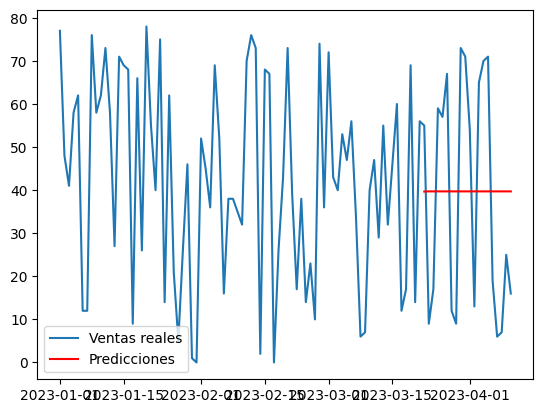

In [10]:
import matplotlib.pyplot as plt

# Ventas reales y predicciones
plt.plot(df.index, df['Ventas'], label='Ventas reales')
plt.plot(test_data.index, predictions, label='Predicciones', color='red')
plt.legend()
plt.show()


# 1. ¿Por qué la fecha debe ser el índice?
La fecha se utiliza combinada como el índice en datos de series temporales por la naturaleza secuencial de los mismos. Al establecer la fecha como índice, se aprovecha su estructura cronológica para realizar análisis temporal y visualización más sencilla. Además, al hacerlo, se facilita el uso de librerías y funciones específicas para el manejo de series temporales, como Pandas, que permiten realizar operaciones y cálculos temporales con mayor facilidad.

2. ¿Qué es ARIMA y para qué se utiliza?
ARIMA significa Media Móvil Integrada Autoregresiva. Es un modelo estadístico para analizar y predecir series temporales. Se compone de tres partes:

AR (Autoregresivo) : Representa la regresión de la serie en sí misma. Modela la relación entre una observación y un número específico de observaciones pasadas.
I (Integrated) : Indica que la serie temporal se diferencia al menos una vez para hacerla estacionaria, es decir, con una media y varianza constantes.
MA (Promedio Móvil) : Consulte la relación entre una observación y el error residual de un modelo de medios móviles aplicado a varios retrasos.
El modelo ARIMA se utiliza para comprender mejor los patrones, tendencias y realizar predicciones en datos secuenciales, como series temporales.

3. ¿Para qué sirven el MSE y el MAE?
MSE (Error cuadrático medio) : Es una métrica que mide el promedio de los cuadrados de las diferencias entre los valores reales y los valores predichos. Cuanto menor sea el MSE, mejor será la capacidad predictiva del modelo.

MAE (Error absoluto medio) : Calcula la media de las diferencias absolutas entre los valores reales y los valores predichos. Es menos sensible a valores atípicos que el MSE, ya que no elevan las diferencias al cuadrado. Al igual que el MSE, un valor menor de MAE indica una mejor capacidad predictiva del modelo.

Estas métricas proporcionan una manera de evaluar cuantitativamente qué tan bien se ajusta el modelo a los datos reales, permitiendo comparar diferentes modelos o ajustes para seleccionar el más apropiado.

Media (promedio) : La media es el valor promedio de un conjunto de datos. Se calcula sumando todos los valores en el conjunto y dividiéndolos por la cantidad de valores. La fórmula general es:

Media = (Suma de todos los valores) / (Número de valores)

Por ejemplo, si tienes el conjunto de datos {2, 4, 6, 8, 10}, la media sería:

Media= (2 + 4 + 6 + 8 + 10) / 5 = 6

La media es una medida útil cuando quieres obtener una idea general de la tendencia central de los datos.

Mediana : La mediana es el valor que ocupa el lugar central en un conjunto de datos cuando estos están ordenados de menor a mayor (o de mayor a menor). Si el conjunto de datos tiene un número impar de valores, la mediana es el valor central. Si el conjunto de datos tiene un número de valor, la mediana es el promedio de los dos valores centrales.

Por ejemplo, en el conjunto {3, 1, 4, 1, 5, 9, 2}, primero lo ordenaríamos de menor a mayor: {1, 1, 2, 3, 4, 5, 9}. La mediana es 3 en este caso, ya que ocupa el lugar central.

La mediana es útil cuando se quiere encontrar un valor que no esté influenciado por valores extremos (outliers).

Moda : La moda es el valor que aparece con mayor frecuencia en un conjunto de datos. Puede haber una moda (unimodal), varias modas (multimodal), o incluso ningún valor que se repita (sin moda).

Por ejemplo, en el conjunto {2, 3, 2, 5, 8, 2, 3, 4}, la moda es 2, ya que es el valor que más se repite.

La moda es útil cuando quieres identificar cuáles son los valores más comunes en un conjunto de datos.

En resumen, la media te da un valor promedio, la mediana te da un valor central y la moda te da el valor más común en un conjunto de datos.